

# Install Qiskit
Packages for google colab
```
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
```

# Imports
```
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke, FakeKyiv
```

# Part I: Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.
You can run the other following cells in the same way.

Credits: Adopted from IBM Qiskit materials

In [189]:
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke, FakeKyiv

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere, plot_distribution, plot_state_city
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator, SamplerV2 as Sampler
from qiskit.providers.basic_provider import BasicProvider
from qiskit.circuit.library import UGate
backend = BasicProvider().get_backend('basic_simulator')
import numpy as np
from numpy import sqrt, pi, random
import matplotlib.pyplot as plt

## I.1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: \
https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems \
https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits

It will help you to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates.

By default, states in Qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z
    qc.rx(alpha, 0) # rotation by alpha around the x-axis
    qc.ry(alpha, 0) # rotation by alpha around the y-axis
    qc.rz(alpha, 0) # rotation by alpha around the z-axis

Try to reach the given state in the Bloch sphere in each of the following exercises by applying the correct rotations. (Press Shift + Enter to run a code cell). In each case print the output state using __Latex__, represent the state on the __Bloch sphere__ and corresponding __density matrix__ using __histograms__.
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$ from state $|0\rangle$.
<!---
<div><img src="attachment:state1.png" width="200"></div>
-->


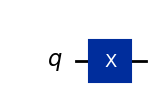

<IPython.core.display.Latex object>

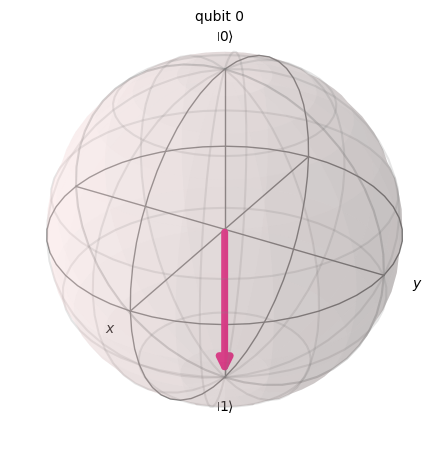

In [ ]:
def lab1_ex1():
    qc = QuantumCircuit(1)
    qc.x(0)
    return qc

qc = lab1_ex1()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

plot_bloch_multivector(qc)

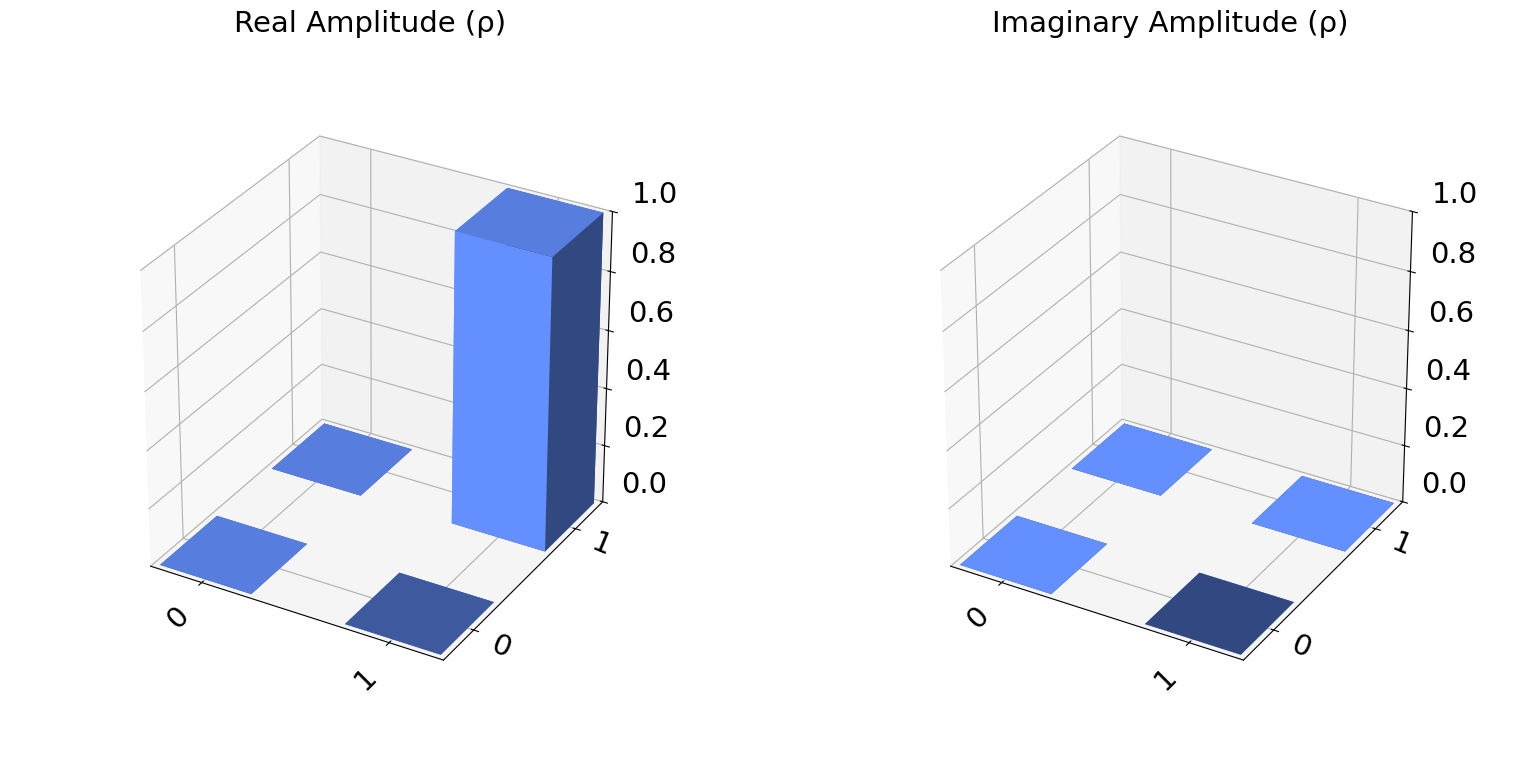

In [51]:
plot_state_city(qc)

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$.
<!--
<div><img src="attachment:plusstate.png" width="200"></div>
-->

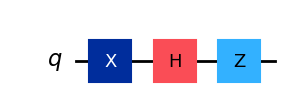

<IPython.core.display.Latex object>

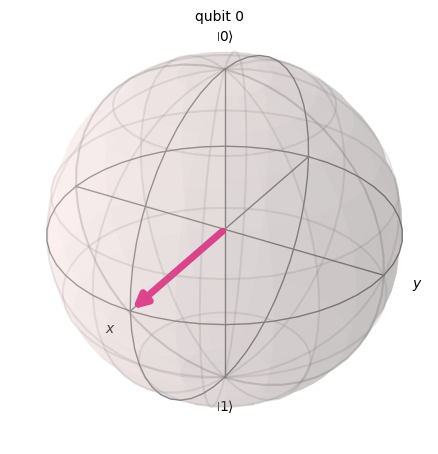

In [65]:
def lab1_ex2():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    qc.z(0)
    return qc

qc = lab1_ex2()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

plot_bloch_multivector(qc)

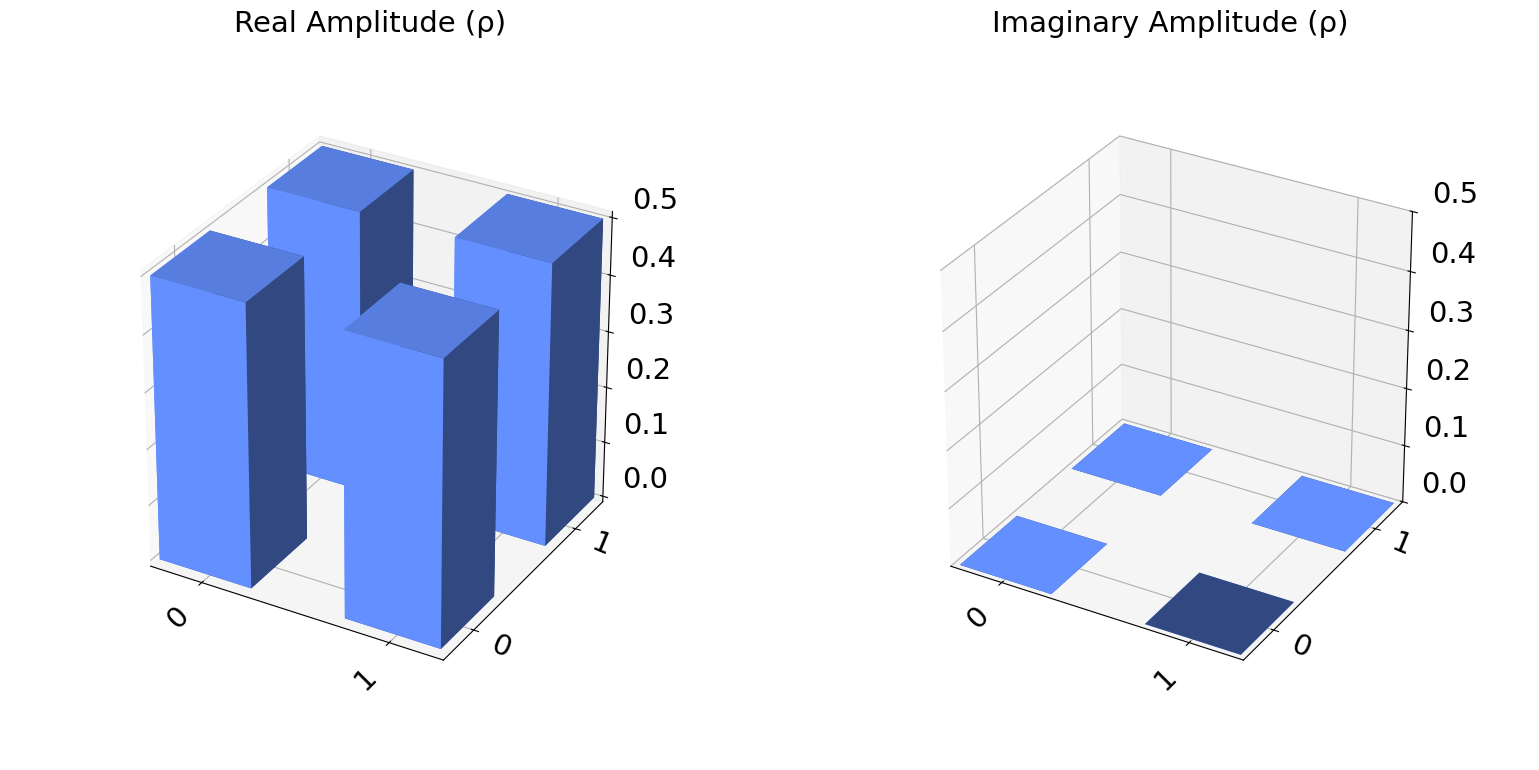

In [66]:
plot_state_city(qc)

### 3.) Let's combine the two operations seen before. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$.
<!--
<div><img src="attachment:minusstate.png" width="200"></div>
-->
Can you even come up with different ways?

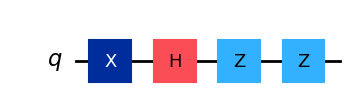

<IPython.core.display.Latex object>

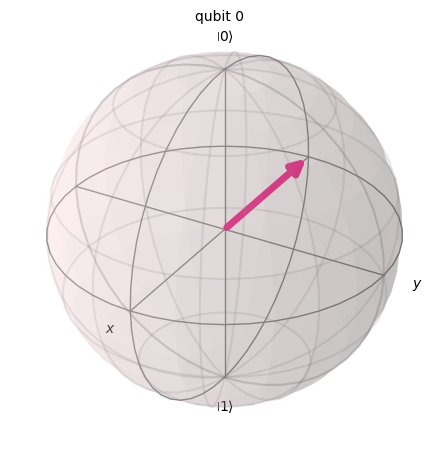

In [68]:
def lab1_ex3():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    qc.z(0)
    qc.z(0)
    return qc

qc = lab1_ex3()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

plot_bloch_multivector(qc)

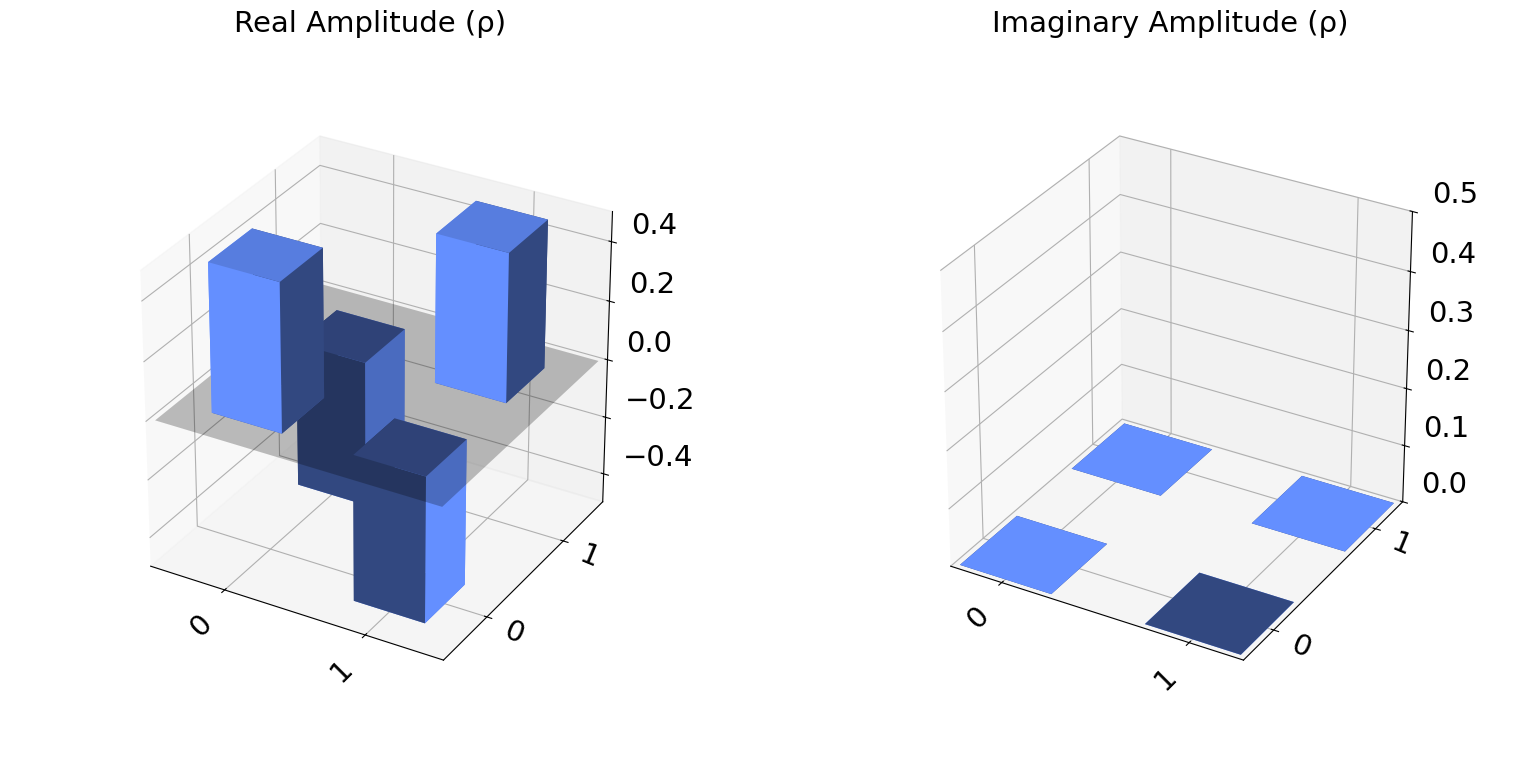

In [69]:
plot_state_city(qc)

### 4.) Next, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$.

<div><img src=attachment:leftstate.png width="200"></div>

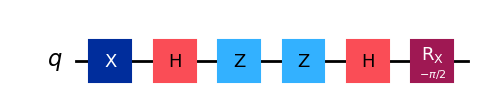

<IPython.core.display.Latex object>

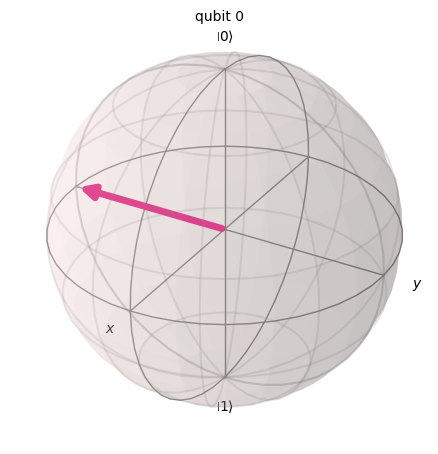

In [72]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    qc.z(0)
    qc.z(0)
    qc.h(0)
    qc.rx(-np.pi/2, 0)
    return qc

qc = lab1_ex4()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

plot_bloch_multivector(qc)

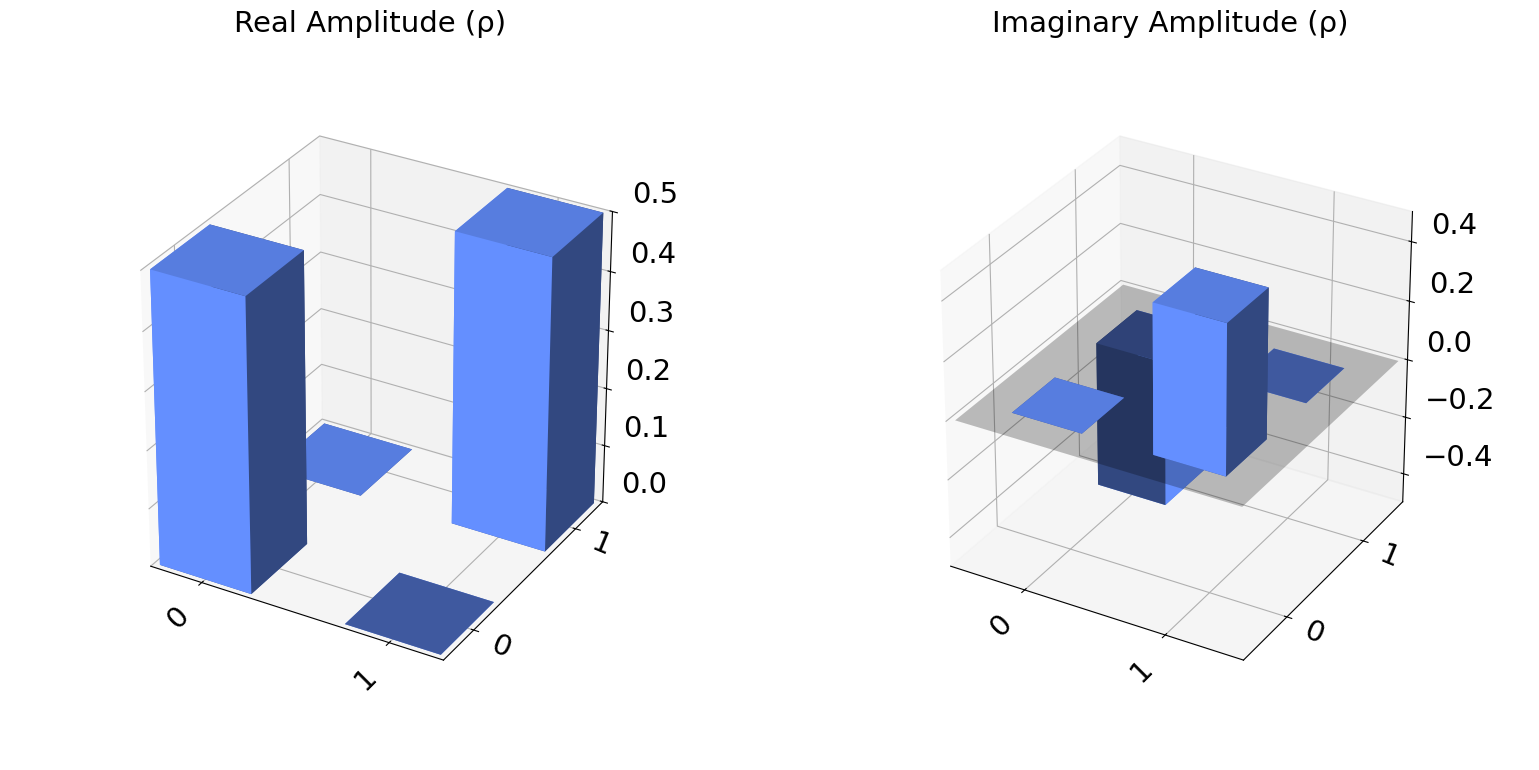

In [73]:
plot_state_city(qc)

### 5.) Next, the goal is to reach the state $|1\rangle$.

<div><img src=attachment:leftstate.png width="200"></div>

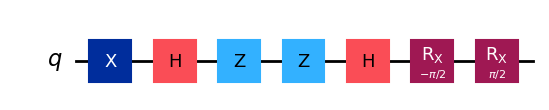

<IPython.core.display.Latex object>

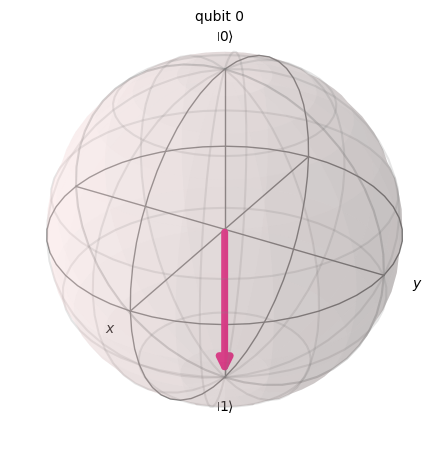

In [75]:
def lab1_ex5():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    qc.z(0)
    qc.z(0)
    qc.h(0)
    qc.rx(-np.pi/2, 0)
    qc.rx(np.pi/2, 0)
    return qc

qc = lab1_ex5()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

plot_bloch_multivector(qc)

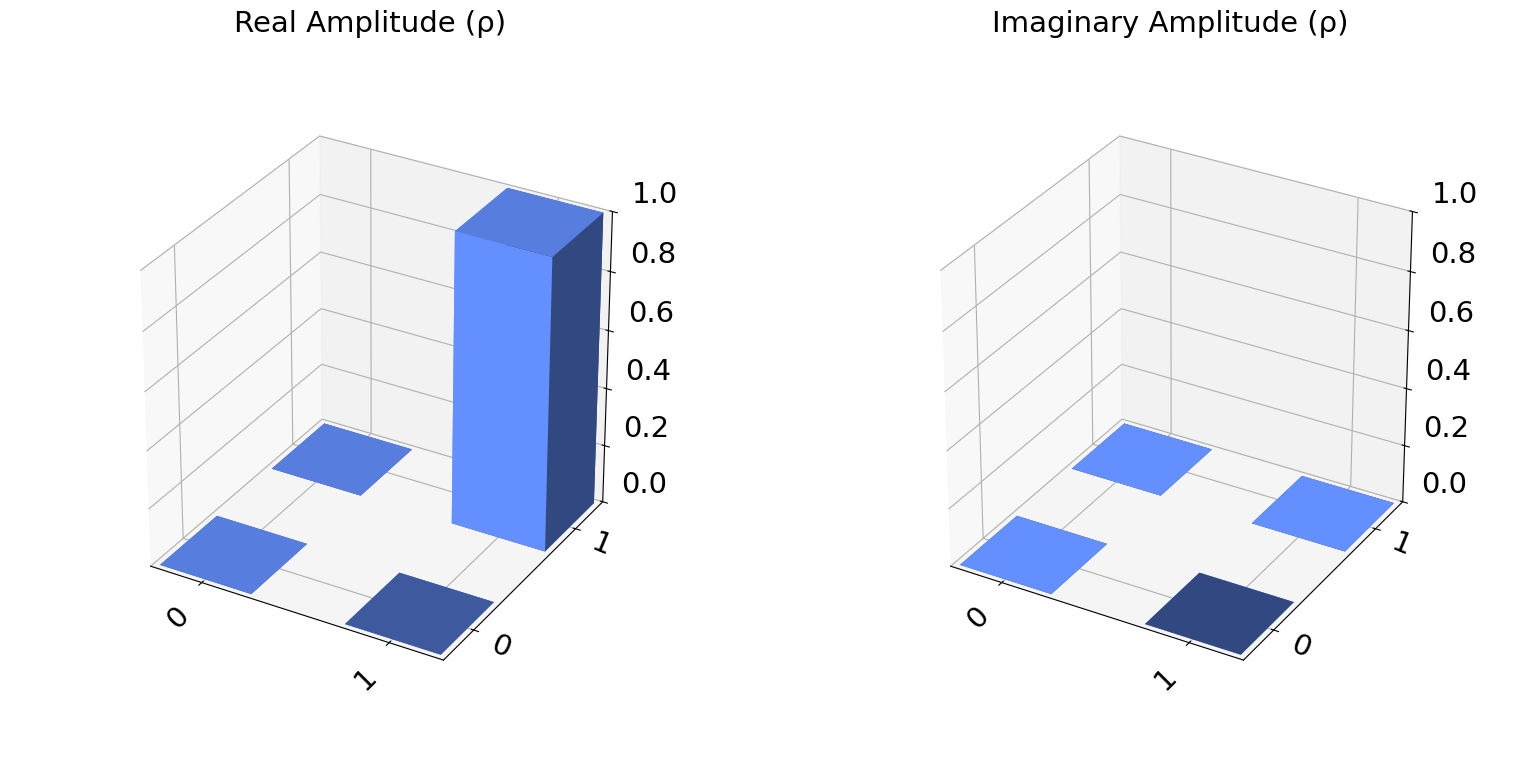

In [76]:
plot_state_city(qc)

## I.2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems


The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate. The CNOT gate has no effect when applied on two qubits in state $|0\rangle$, but this changes if we apply a Hadamard gate before to the control qubit to bring it in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. There are four Bell states in total, so let's try to also construct another one:


### 6.) Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$. Draw the cricuit and show that indeed the circuit generates entangled $|\Psi^+\rangle$ from initial state $|00\rangle$

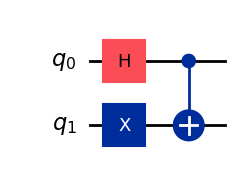

<IPython.core.display.Latex object>

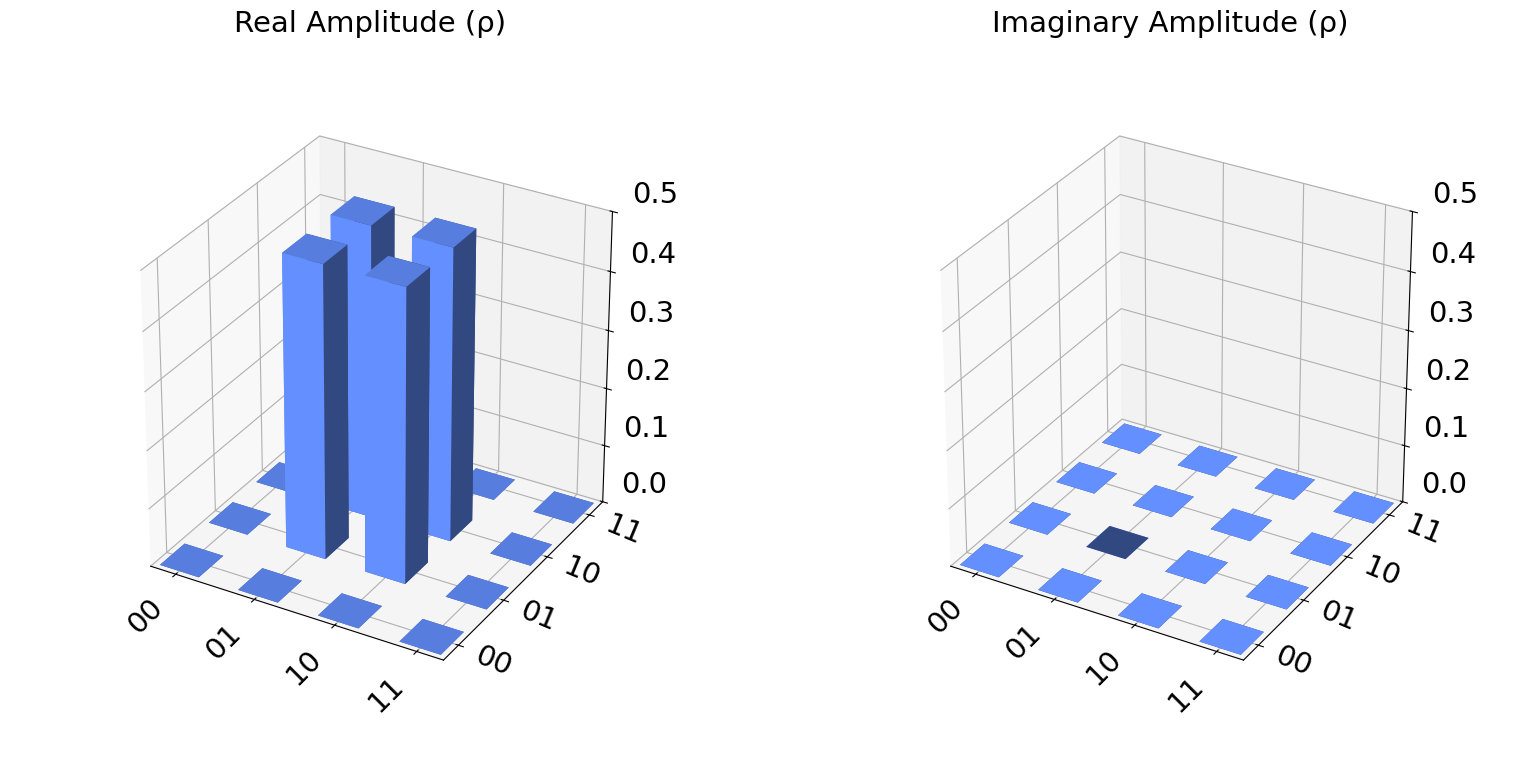

In [147]:
def lab1_ex6():
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.x(1)
    qc.cx(0, 1)
    return qc

qc = lab1_ex6()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))
plot_state_city(qc)


Add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

{'10': 525, '01': 499}


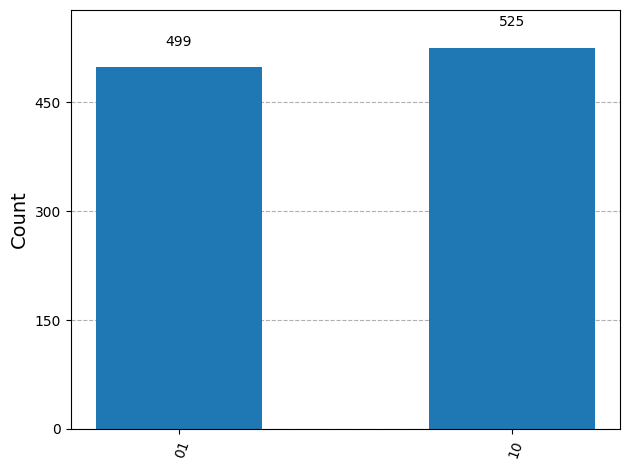

In [149]:
qc = lab1_ex6()
qc.measure_all()

backend = AerSimulator()

result = backend.run(qc).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

### 6.a) Construct the Bell state $|\Phi^-\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$. Draw the cricuit and show that indeed the circuit generates entangled $|\Phi^-\rangle$ from initial state $|00\rangle$

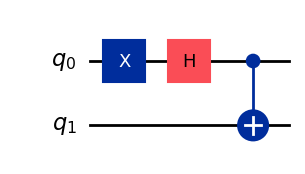

<IPython.core.display.Latex object>

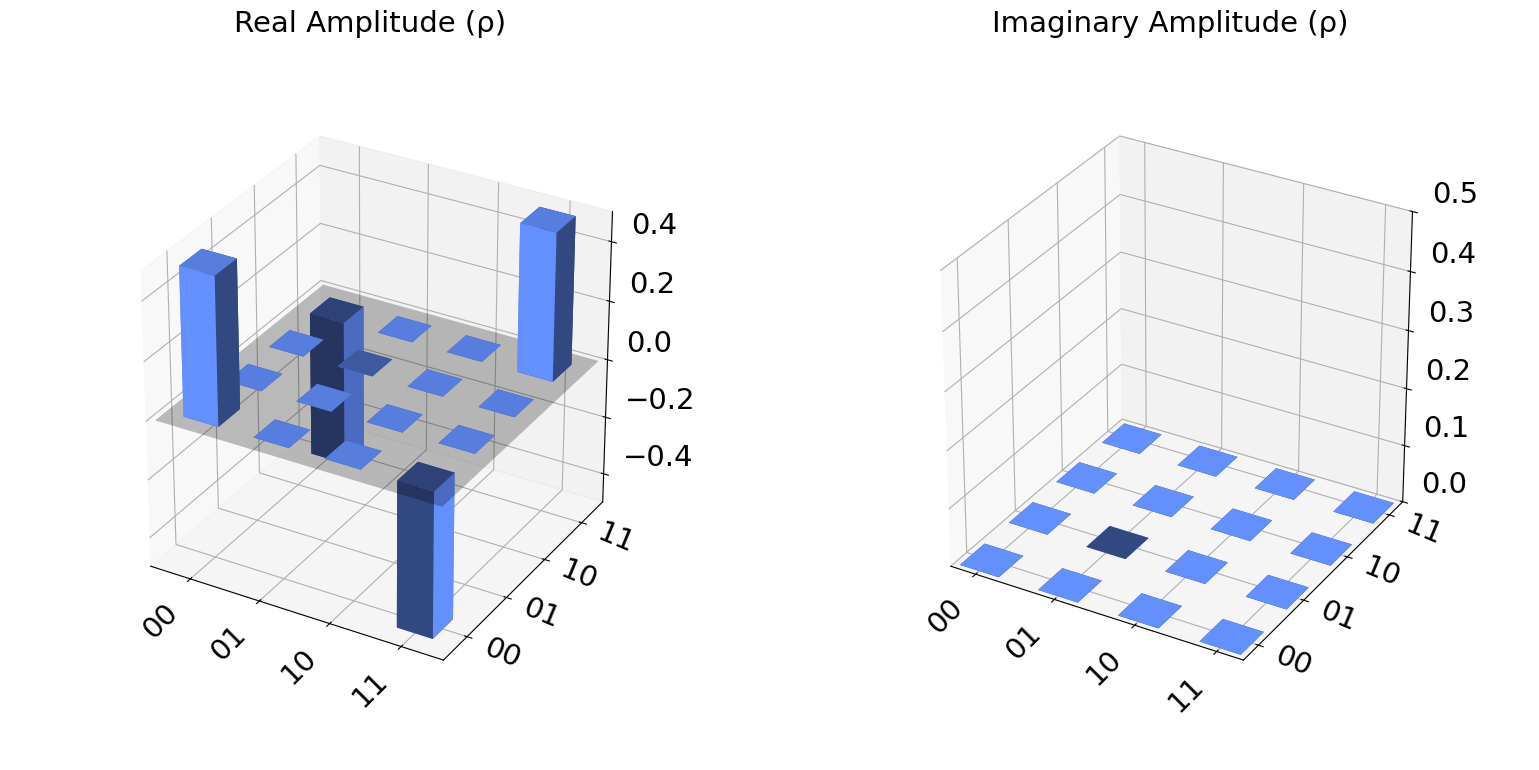

In [151]:
def lab1_ex6a():
    qc = QuantumCircuit(2)
    qc.x(0)
    qc.h(0)
    qc.cx(0, 1)
    return qc

qc = lab1_ex6a()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))
plot_state_city(qc)


Add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

{'11': 502, '00': 522}


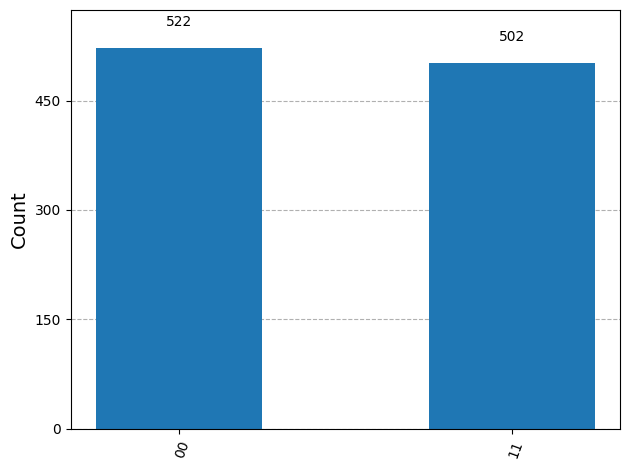

In [153]:
qc = lab1_ex6a()
qc.measure_all()

backend = AerSimulator()

result = backend.run(qc).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

### 7.a) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$.

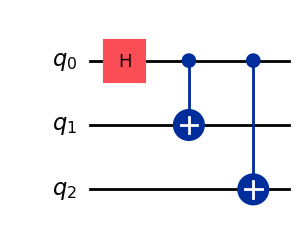

<IPython.core.display.Latex object>

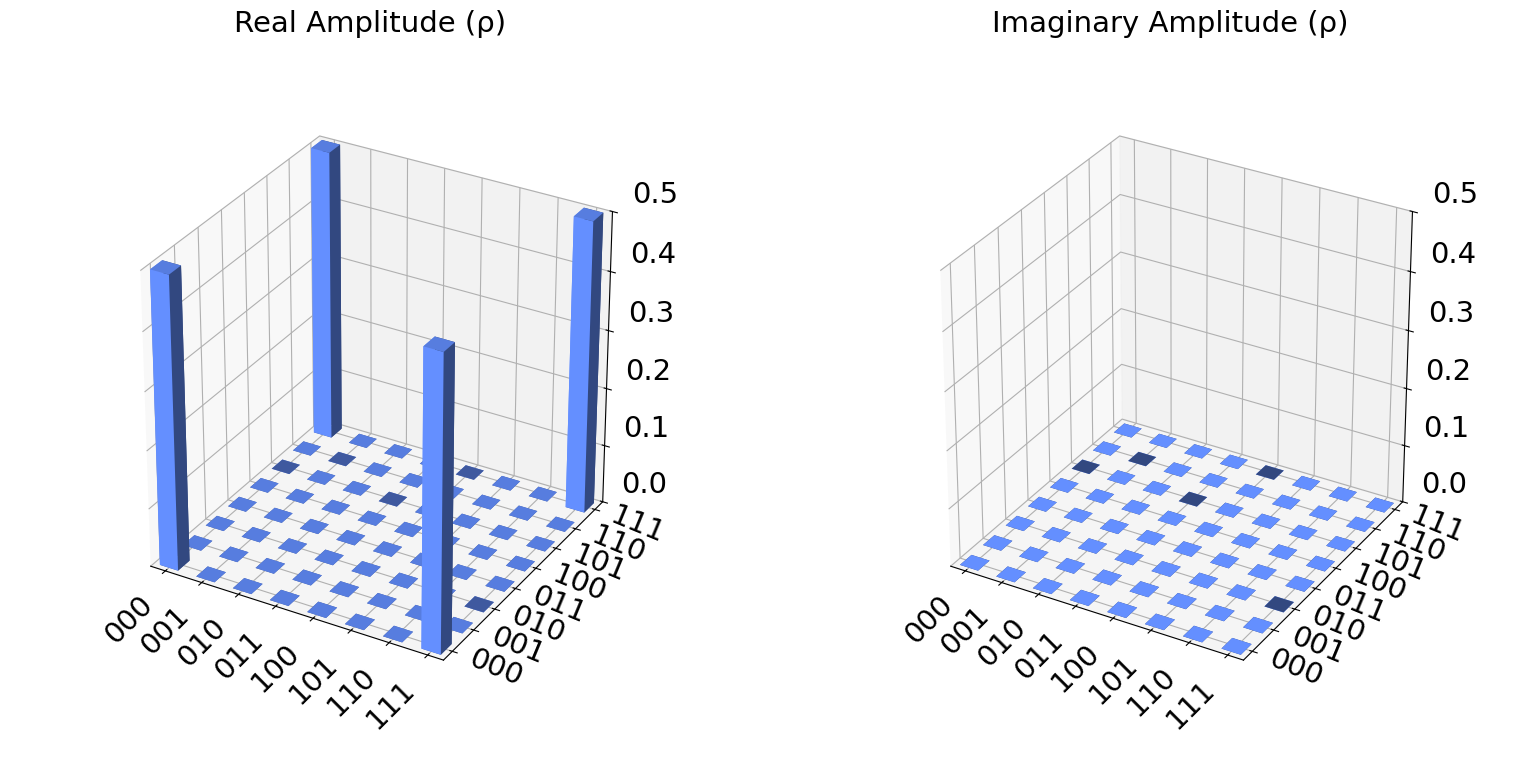

In [154]:
def lab1_ex7a():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    return qc

qc = lab1_ex7a()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))
plot_state_city(qc)

Measure this circuit the same way as before.

{'000': 529, '111': 495}


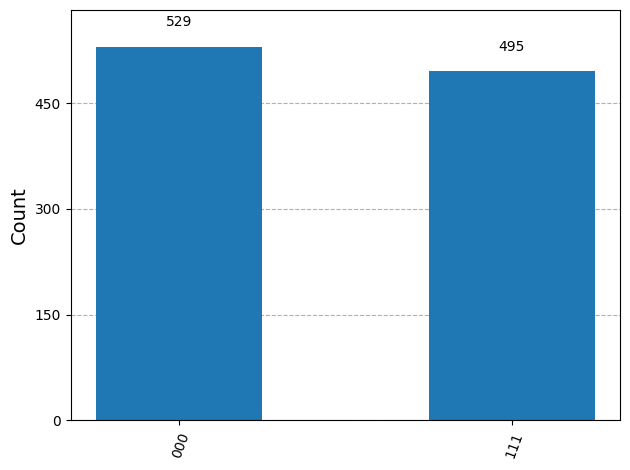

In [155]:
qc = lab1_ex7a()
qc.measure_all()

backend = AerSimulator()

result = backend.run(qc).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

### 7.b) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|011\rangle - |100 \rangle \right)$.

<div><img src="attachment:ghz_circuit.png" width="200"></div>

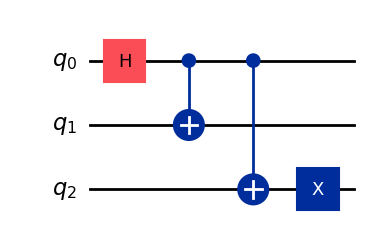

<IPython.core.display.Latex object>

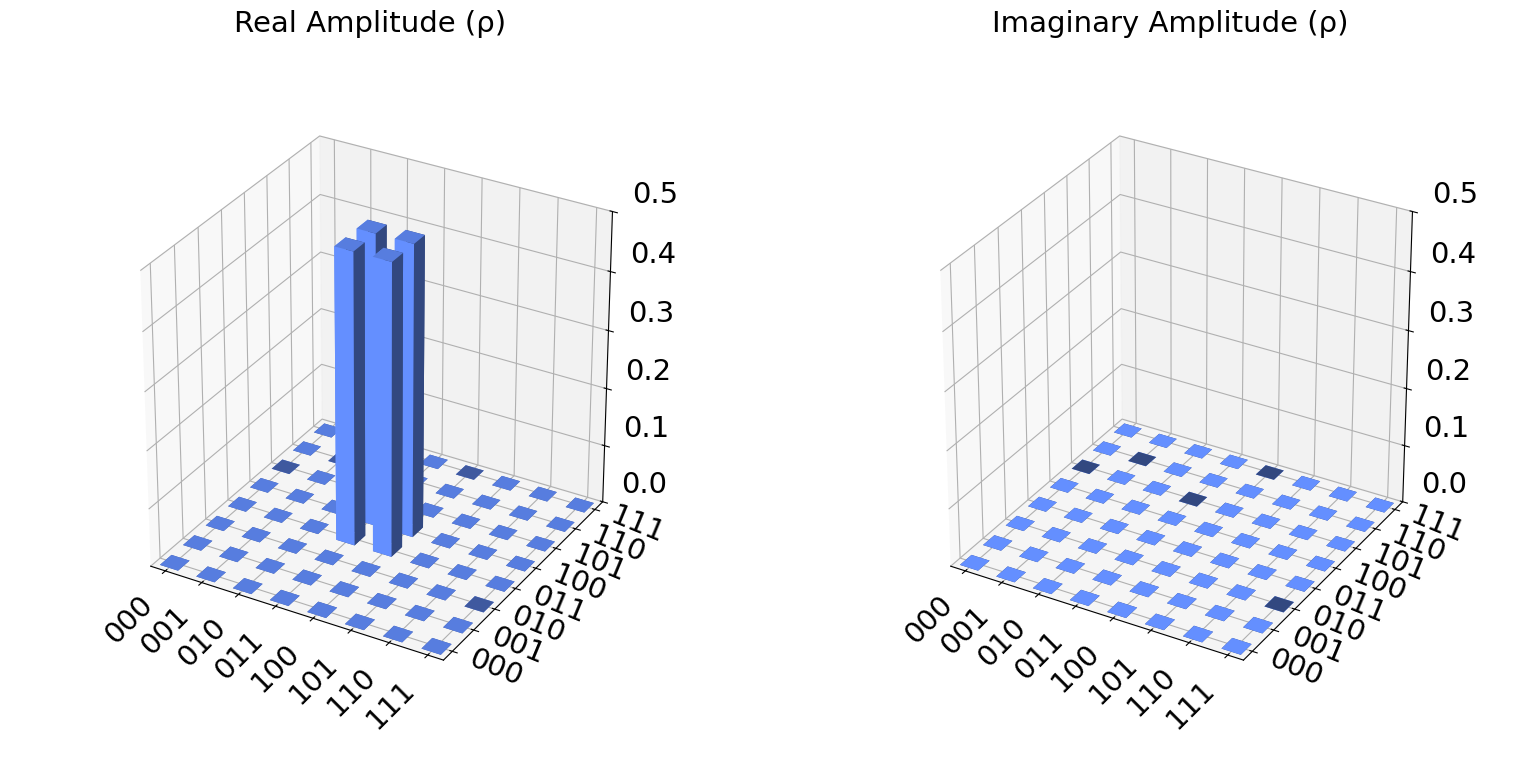

In [161]:
def lab1_ex7b():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.cx(0, 1)
    
    qc.cx(0, 2)
    qc.x(2)
    return qc

qc = lab1_ex7b()
display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))
plot_state_city(qc)


Measure this circuit the same way  before.

{'100': 496, '011': 528}


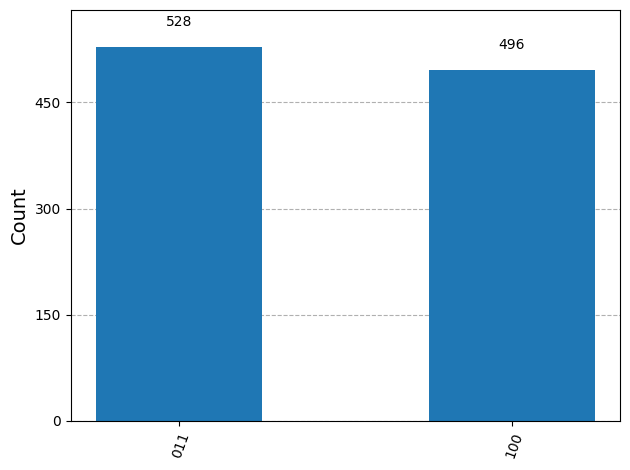

In [162]:
qc = lab1_ex7b()
qc.measure_all()

backend = AerSimulator()

result = backend.run(qc).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# I.3 Jupyter Notebook, Qiskit, Quantum Circuits, Statevectors, Quantum simulators
https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector 
## Excercises
### 8. Write program in Jupyter Notebook responsible for creating circuits from previous excercise (I.2):
a) Veryfy that created circuits generate desired states by using ```Statevector``` class and function ```from_instruction()``` and function draw() .<br>
b) Using function ```sample_counts()``` from ```Statevector``` class which generates "statistics" over for given number of "shots", emulate outcome for a given number (shots) of mesurements, generate appriopriate histograms.<br>
c) Run the (noisless) quantum circuit and generate appriopriate histograms using ```StatevectorSampler``` class. <br>
d) Run the quantum circuit (including noise) using ```GenericBackendV2``` class for a backend (requires QiskitAer, pip install qiskit-aer)<br> 
e) Run the quantum circuit (including noise) using selected ```fake_provider``` (mimicking real quantum processors) from fake provider module (https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake-provider) for a backend. <br>

# HOMEWORK
## I. Jupyter Notebooks:
1. Finish exercises from laboratory classes and sent appropriate notebook via UPEL platform.
2. Create and run a quantum circuit resulting in superposition of 2 basis states being binary representation of ASCII code for the first letters of your name and surname. Prove that it generates proper superposition in similar manner as in exercise II.1. Compare the results between simulator and real device. Running circuits on real backend requires IBMid (creating account on IBM quantum platform https://quantum.ibm.com/).
3. In case of time consuming simulation check which bit in your two bit strings is fixed. Put it aside to add later. Limit your superposition bit strings to remaining 7 bits only. Then run the circuit again on a simulator and a real quantum device adding the 8th bit in post processing. Compare the results between simulator and real device.
## II. Preparation for next classes, recommended reading 
1. Read a good article on quantum computing by John Preskill: https://arxiv.org/pdf/1801.00862.pdf
2. Install Qiskit and Jupyter Notebook on you computer at home. Best approach is to install Anaconda and then Qiskit (google for qiskit installation).
3. Create a IBMid to have an access to IBM quantum platform https://quantum.ibm.com/
4. Read about Deutsch algorithm and try to understand how it works. This is a simple algorithm demonstrating quantum computer benefits. You can find a lot of resources online, including videos on this. So, please explore.

Binary for 'G' (67): 01000111
Binary for 'E' (65): 01000101

Fixed bits (same in both): [0, 1, 2, 3, 4, 5, 7]
Varying bits: [6]


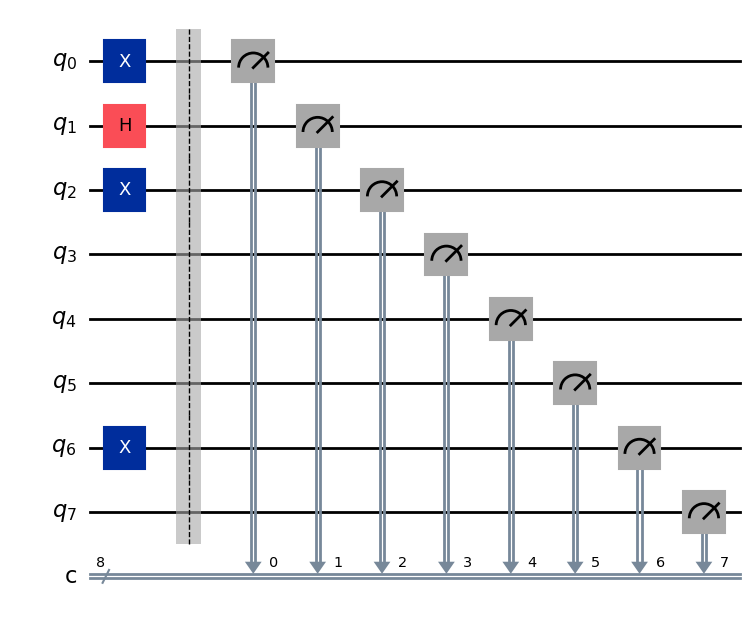

In [205]:
from qiskit import QuantumRegister, ClassicalRegister, transpile

ascii_G = ord('G')
ascii_E = ord('E')

binary_G = format(ascii_G, '08b')
binary_E = format(ascii_E, '08b')

print(f"Binary for 'G' (67): {binary_G}")
print(f"Binary for 'E' (65): {binary_E}")

# Find fixed bits
fixed_bits = []
varying_bits = []
for i, (bit_G, bit_E) in enumerate(zip(binary_G, binary_E)):
    if bit_G == bit_E:
        fixed_bits.append(i)
    else:
        varying_bits.append(i)

print()
print(f"Fixed bits (same in both): {fixed_bits}")
print(f"Varying bits: {varying_bits}")

##

qreg = QuantumRegister(8, 'q')
creg = ClassicalRegister(8, 'c')
qc = QuantumCircuit(qreg, creg)

# Set fixed bits to 1, hadamard varying bits
for i, (bit_G, bit_E) in enumerate(zip(binary_G, binary_E)):
    if bit_G == bit_E == "1":
        qc.x(qreg[7-i])
    # elif bit_G == bit_E == "0":
    elif bit_G != bit_E:
        qc.h(qreg[7-i])

qc.barrier()
qc.measure(qreg, creg)

display(qc.draw(output="mpl"))

{'01000111': 503, '01000101': 521}


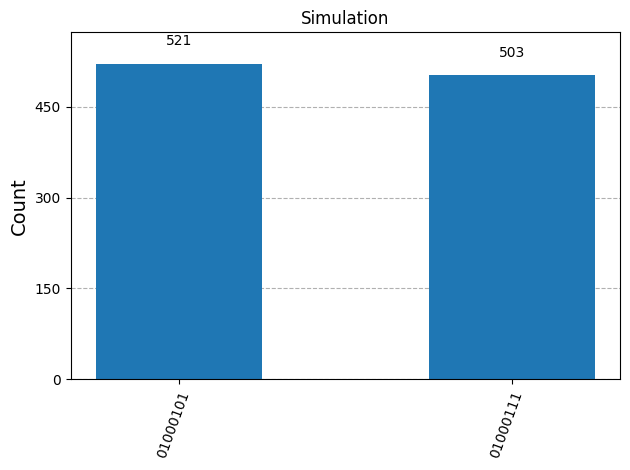

In [204]:
# Run on sim

simulator = AerSimulator()
shots = 1024

# Transpile and run
qc_transpiled = transpile(qc, simulator)
job = simulator.run(qc_transpiled, shots=shots)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts, title='Simulation')

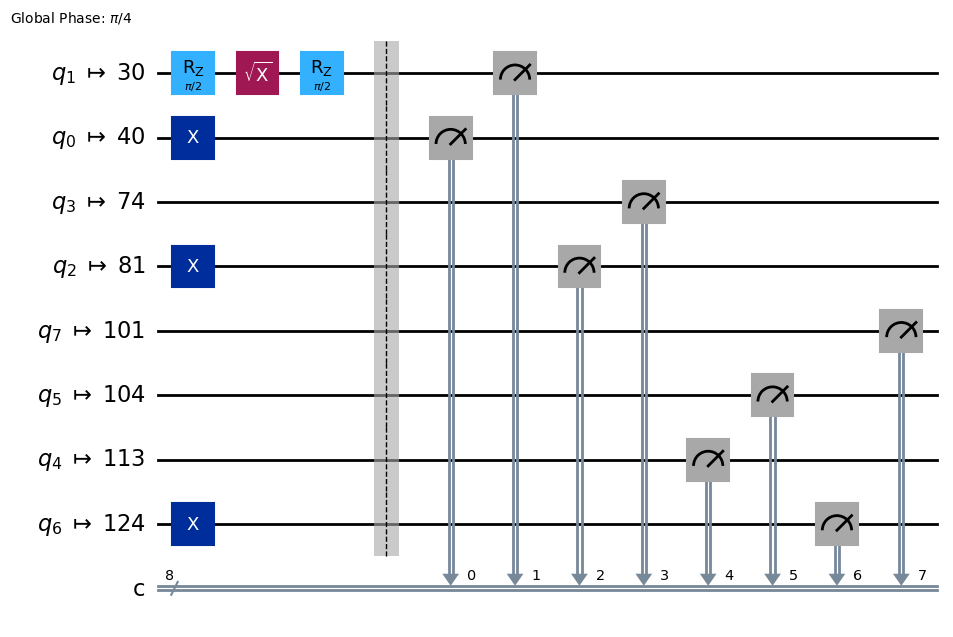

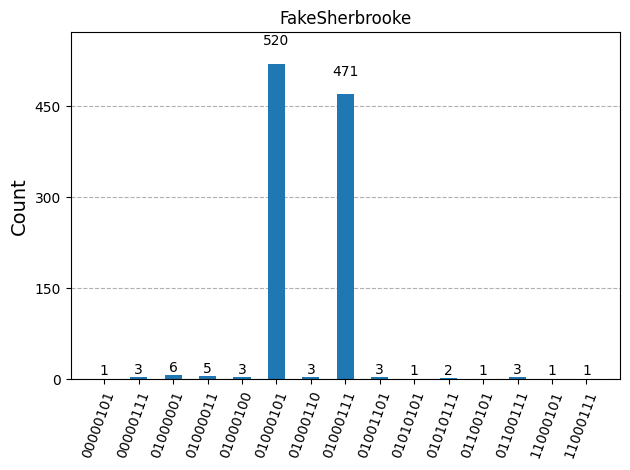

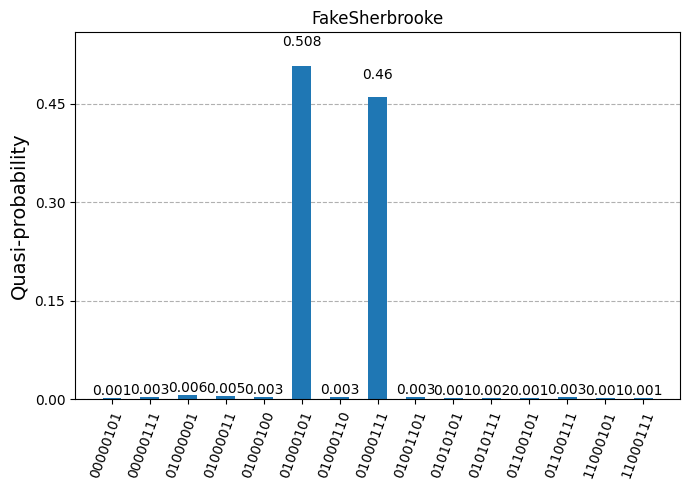

In [203]:
# Run on fake

backend = FakeSherbrooke()

# Transpile first
qc_real = transpile(qc, backend, optimization_level=3)
display(qc_real.draw('mpl'))

job = backend.run(qc_real, shots=1024)
counts_r = job.result().get_counts()
display(plot_histogram(counts_r, title="FakeSherbrooke"))
display(plot_distribution(counts_r, title="FakeSherbrooke"))